In [1]:
import datetime as dt

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error

In [3]:
df=pd.read_csv('gas_turbines.csv')

In [4]:
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [5]:
df.isnull().any()

AT      False
AP      False
AH      False
AFDP    False
GTEP    False
TIT     False
TAT     False
TEY     False
CDP     False
CO      False
NOX     False
dtype: bool

In [6]:
df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [7]:
df.dtypes


AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [8]:
df.nunique()

AT      12086
AP        540
AH      12637
AFDP    11314
GTEP     8234
TIT       706
TAT      2340
TEY      4207
CDP      3611
CO      13096
NOX     11996
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [10]:
df[df.duplicated()].shape

(0, 11)

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AT,15039.0,17.764381,7.574323,0.522300,11.408000,18.1860,23.8625,34.9290
AP,15039.0,1013.199240,6.410760,985.850000,1008.900000,1012.8000,1016.9000,1034.2000
AH,15039.0,79.124174,13.793439,30.344000,69.750000,82.2660,90.0435,100.2000
AFDP,15039.0,4.200294,0.760197,2.087400,3.723900,4.1862,4.5509,7.6106
GTEP,15039.0,25.419061,4.173916,17.878000,23.294000,25.0820,27.1840,37.4020
TIT,15039.0,1083.798770,16.527806,1000.800000,1079.600000,1088.7000,1096.0000,1100.8000
TAT,15039.0,545.396183,7.866803,512.450000,542.170000,549.8900,550.0600,550.6100
TEY,15039.0,134.188464,15.829717,100.170000,127.985000,133.7800,140.8950,174.6100
CDP,15039.0,12.102353,1.103196,9.904400,11.622000,12.0250,12.5780,15.0810
CO,15039.0,1.972499,2.222206,0.000388,0.858055,1.3902,2.1604,44.1030


In [12]:
df.corr()["TEY"].sort_values(ascending=False)

TEY     1.000000
CDP     0.988473
GTEP    0.977042
TIT     0.891587
AFDP    0.717995
AP      0.146939
NOX    -0.102631
AH     -0.110272
AT     -0.207495
CO     -0.541751
TAT    -0.720356
Name: TEY, dtype: float64

In [13]:
numerical_features = df.describe(include=["int64","float64"]).columns
numerical_features

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

<AxesSubplot:>

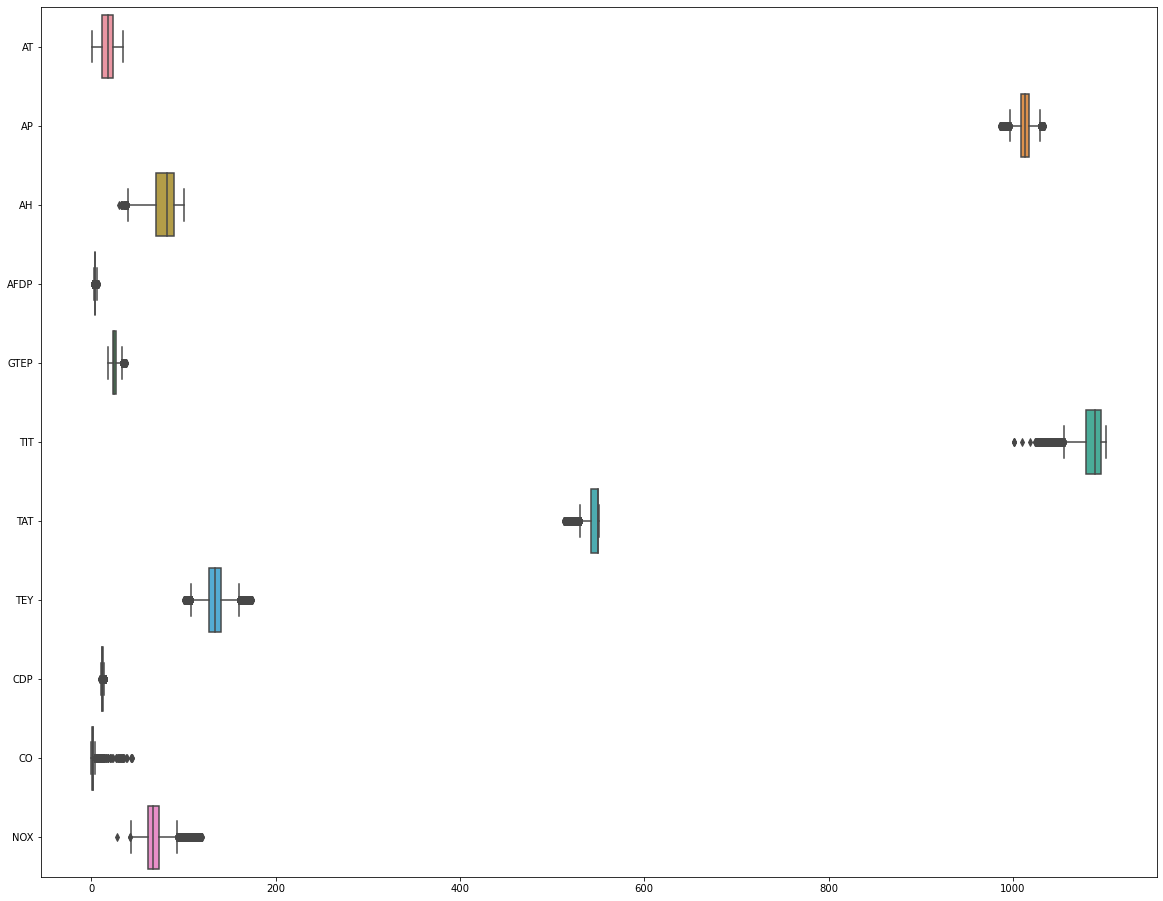

In [14]:
 plt.figure(figsize=(20,16))
sns.boxplot(data=df[numerical_features], orient="h")

In [16]:
def build_model(hp):
    model =Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=100,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mean_absolute_error',
        metrics=['mean_absolute_error'])
    return model

In [28]:
pip install keras-tuner --upgrade

Note: you may need to restart the kernel to use updated packages.


In [29]:
from kerastuner.tuners import RandomSearch

C:\Users\91720\AppData\Local\Temp\ipykernel_16772\2610907151.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [30]:
import warnings
warnings.filterwarnings('ignore')
from keras.optimizers import Adam
from kerastuner.tuners import RandomSearch
from tensorflow.keras import layers
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.constraints import maxnorm
from keras.wrappers.scikit_learn import KerasRegressor, KerasClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

In [31]:
tuner = RandomSearch(build_model,objective='val_mean_absolute_error',max_trials=5,  executions_per_trial=3,directory='project',project_name='Gas Turbine')


In [32]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [34]:
tuner.results_summary()

Results summary
Results in project\Gas Turbine
Showing 10 best trials


In [35]:
def create_model():
    model1 = Sequential()
    model1.add(Dense(32,input_dim=7,activation='relu'))
    model1.add(Dense(64,activation='relu'))
    model1.add(Dense(96,activation="relu"))
    model1.add(Dense(32,activation="relu"))
    model1.add(Dense(64,activation="relu"))
    model1.add(Dense(32,activation="relu"))
    model1.add(Dense(96,activation="relu"))
    model1.add(Dense(96,activation="relu"))
    model1.add(Dense(32,activation="relu"))
    model1.add(Dense(64,activation="relu"))
    model1.add(Dense(64,activation="relu"))
    model1.add(Dense(units=1,activation="linear"))
    
    adam=Adam(learning_rate=0.001)
    model1.compile(loss='mean_absolute_error',optimizer = adam,metrics=["mean_absolute_error"])
    return model1

In [36]:
model1 =KerasRegressor(build_fn=create_model,verbose=0)
batch_size=[10,20,40,50]
epochs=[10,50,100,200]
param_grid=dict(batch_size=batch_size,epochs=epochs)
grid = GridSearchCV(estimator=model1,param_grid=param_grid,cv=KFold(),verbose=10)

In [37]:
grid_result = grid.fit(x_test,y_test)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START batch_size=10, epochs=10...................................
[CV 1/5; 1/16] END ...batch_size=10, epochs=10;, score=-2.854 total time=   5.3s
[CV 2/5; 1/16] START batch_size=10, epochs=10...................................
[CV 2/5; 1/16] END ...batch_size=10, epochs=10;, score=-1.303 total time=   4.9s
[CV 3/5; 1/16] START batch_size=10, epochs=10...................................
[CV 3/5; 1/16] END ...batch_size=10, epochs=10;, score=-2.746 total time=   4.7s
[CV 4/5; 1/16] START batch_size=10, epochs=10...................................
[CV 4/5; 1/16] END ...batch_size=10, epochs=10;, score=-2.759 total time=   4.6s
[CV 5/5; 1/16] START batch_size=10, epochs=10...................................
[CV 5/5; 1/16] END ...batch_size=10, epochs=10;, score=-2.580 total time=   4.6s
[CV 1/5; 2/16] START batch_size=10, epochs=50...................................
[CV 1/5; 2/16] END ...batch_size=10, epochs=50;,

KeyboardInterrupt: 

In [ ]:
print('Best {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

In [25]:
model_data = df[['CDP', 'GTEP','TIT', 'TAT', 'AFDP', 'CO', 'AT',"TEY"]]
model_data.head()

,CDP,GTEP,TIT,TAT,AFDP,CO,AT,TEY
0,10.605,19.663,1059.2,550.00,3.5000,3.1547,6.8594,114.70
1,10.598,19.728,1059.3,550.00,3.4998,3.2363,6.7850,114.72
2,10.601,19.779,1059.4,549.87,3.4824,3.2012,6.8977,114.71
3,10.606,19.792,1059.6,549.99,3.4805,3.1923,7.0569,114.72
4,10.612,19.765,1059.7,549.98,3.4976,3.2484,7.3978,114.72


In [26]:
model_data

,CDP,GTEP,TIT,TAT,AFDP,CO,AT,TEY
0,10.605,19.663,1059.2,550.00,3.5000,3.1547,6.8594,114.70
1,10.598,19.728,1059.3,550.00,3.4998,3.2363,6.7850,114.72
2,10.601,19.779,1059.4,549.87,3.4824,3.2012,6.8977,114.71
3,10.606,19.792,1059.6,549.99,3.4805,3.1923,7.0569,114.72
4,10.612,19.765,1059.7,549.98,3.4976,3.2484,7.3978,114.72
...,...,...,...,...,...,...,...,...
15034,10.400,19.164,1049.7,546.21,3.5421,4.5186,9.0301,111.61
15035,10.433,19.414,1046.3,543.22,3.5059,4.8470,7.8879,111.78
15036,10.483,19.530,1037.7,537.32,3.4770,7.9632,7.2647,110.19
15037,10.533,19.377,1043.2,541.24,3.4486,6.2494,7.0060,110.74


In [39]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, scale

In [40]:
x = model_data.drop('TEY', axis=1)
y = model_data[["TEY"]]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state=42)

scaler_train = StandardScaler()
scaler_test = StandardScaler()

x_train_scaled = scaler_train.fit_transform(x_train) 
x_test_scaled  = scaler_test.fit_transform(x_test) 

print(x_train_scaled.shape)
print(x_test_scaled.shape)
print(y_train.shape)
print(y_test.shape)

(12031, 7)
(3008, 7)
(12031, 1)
(3008, 1)


In [41]:
model = Sequential()
model.add( Dense( units = 50 , activation = 'relu' , kernel_initializer = 'normal', input_dim = 7)) 
model.add( Dense( units = 20 , activation = 'tanh' , kernel_initializer = 'normal' )) 
model.add( Dense( units = 1  , kernel_initializer = 'normal' )) 

model.compile(optimizer= "adam", loss="mse", metrics= ["mae", "mse"])
model.fit(x_train_scaled, y_train , batch_size=50, validation_split=0.3, epochs=100,  verbose=1)

Epoch 1/100
169/169 [==============================] - 1s 3ms/step - loss: 17632.9609 - mae: 131.8193 - mse: 17632.9609 - val_loss: 16784.5039 - val_mae: 128.5937 - val_mse: 16784.5039
Epoch 2/100
169/169 [==============================] - 0s 2ms/step - loss: 16286.7461 - mae: 126.6246 - mse: 16286.7461 - val_loss: 15729.5830 - val_mae: 124.4249 - val_mse: 15729.5830
Epoch 3/100
169/169 [==============================] - 0s 2ms/step - loss: 15310.7959 - mae: 122.7104 - mse: 15310.7959 - val_loss: 14811.2422 - val_mae: 120.6782 - val_mse: 14811.2422
Epoch 4/100
169/169 [==============================] - 1s 3ms/step - loss: 14426.1611 - mae: 119.0548 - mse: 14426.1611 - val_loss: 13958.8633 - val_mae: 117.0935 - val_mse: 13958.8633
Epoch 5/100
169/169 [==============================] - 0s 2ms/step - loss: 13597.5146 - mae: 115.5213 - mse: 13597.5146 - val_loss: 13154.8955 - val_mae: 113.6086 - val_mse: 13154.8955
Epoch 6/100
169/169 [==============================] - 0s 2ms/step - loss: 

169/169 [==============================] - 0s 2ms/step - loss: 0.6289 - mae: 0.5249 - mse: 0.6289 - val_loss: 0.5809 - val_mae: 0.5038 - val_mse: 0.5809
Epoch 95/100
169/169 [==============================] - 0s 3ms/step - loss: 0.5962 - mae: 0.5146 - mse: 0.5962 - val_loss: 0.6791 - val_mae: 0.5545 - val_mse: 0.6791
Epoch 96/100
169/169 [==============================] - 0s 3ms/step - loss: 0.5758 - mae: 0.5118 - mse: 0.5758 - val_loss: 0.5602 - val_mae: 0.5047 - val_mse: 0.5602
Epoch 97/100
169/169 [==============================] - 0s 2ms/step - loss: 0.5525 - mae: 0.5008 - mse: 0.5525 - val_loss: 0.5354 - val_mae: 0.4994 - val_mse: 0.5354
Epoch 98/100
169/169 [==============================] - 0s 3ms/step - loss: 0.5380 - mae: 0.4979 - mse: 0.5380 - val_loss: 0.5667 - val_mae: 0.5349 - val_mse: 0.5667
Epoch 99/100
169/169 [==============================] - 1s 3ms/step - loss: 0.5210 - mae: 0.4941 - mse: 0.5210 - val_loss: 0.5135 - val_mae: 0.4969 - val_mse: 0.5135
Epoch 100/100
169

In [42]:
def toFindBestParams(x_train_scaled, y_train, x_test_scaled, y_test):
        
    
    batch_size_list = [5 , 10 , 15 , 20]
    epoch_list      = [5 , 10 , 50 , 100]
     
    bestParamTable = pd.DataFrame()
    
    for batch_trial in batch_size_list:
        for epochs_trial in epoch_list:
            
            
            model = Sequential()
            
            model.add(Dense(units=50, input_dim=x_train_scaled.shape[1], kernel_initializer='normal', activation='relu'))
            
            
            model.add(Dense(units=20, kernel_initializer='normal', activation='tanh'))
 
        
            model.add(Dense(1, kernel_initializer='normal'))
 
            
            model.compile(optimizer ='adam', loss = 'mean_squared_error')
            
           
            model.fit(x_train_scaled, y_train , batch_size=batch_trial, epochs=epochs_trial,  verbose=0)
                        
            MAPE = np.mean(100 * (np.abs(y_test-model.predict(x_test_scaled))/y_test))  
                        
            bestParamTable=bestParamTable.append(pd.DataFrame(data=[[batch_trial, epochs_trial, 100-MAPE]],
                                                        columns=['batchsize','epochs','Accuracy'] ))
            
            
            print('batch_size:', batch_trial,'-', 'epochs:',epochs_trial, 'Accuracy:',100-MAPE)

    return bestParamTable


finalParamTable = toFindBestParams(x_train_scaled, y_train, x_test_scaled, y_test)
finalParamTable

94/94 [==============================] - 0s 1ms/step
batch_size: 5 - epochs: 5 Accuracy: TEY    97.586453
dtype: float64
94/94 [==============================] - 0s 1ms/step
batch_size: 5 - epochs: 10 Accuracy: TEY    99.446121
dtype: float64
94/94 [==============================] - 0s 3ms/step
batch_size: 5 - epochs: 50 Accuracy: TEY    99.625289
dtype: float64
94/94 [==============================] - 0s 1ms/step
batch_size: 5 - epochs: 100 Accuracy: TEY    99.66114
dtype: float64
94/94 [==============================] - 0s 1ms/step
batch_size: 10 - epochs: 5 Accuracy: TEY    81.125813
dtype: float64
94/94 [==============================] - 0s 1ms/step
batch_size: 10 - epochs: 10 Accuracy: TEY    98.259452
dtype: float64
94/94 [==============================] - 0s 1ms/step
batch_size: 10 - epochs: 50 Accuracy: TEY    99.612469
dtype: float64
94/94 [==============================] - 0s 1ms/step
batch_size: 10 - epochs: 100 Accuracy: TEY    99.648396
dtype: float64
94/94 [==============

,batchsize,epochs,Accuracy
0,5,5,TEY 97.586453 dtype: float64
0,5,10,TEY 99.446121 dtype: float64
0,5,50,TEY 99.625289 dtype: float64
0,5,100,TEY 99.66114 dtype: float64
0,10,5,TEY 81.125813 dtype: float64
0,10,10,TEY 98.259452 dtype: float64
0,10,50,TEY 99.612469 dtype: float64
0,10,100,TEY 99.648396 dtype: float64
0,15,5,TEY 58.631911 dtype: float64
0,15,10,TEY 89.837377 dtype: float64


In [44]:
finalParamTable

,index,batchsize,epochs,Accuracy
0,0,5,5,TEY 97.586453 dtype: float64
1,0,5,10,TEY 99.446121 dtype: float64
2,0,5,50,TEY 99.625289 dtype: float64
3,0,5,100,TEY 99.66114 dtype: float64
4,0,10,5,TEY 81.125813 dtype: float64
5,0,10,10,TEY 98.259452 dtype: float64
6,0,10,50,TEY 99.612469 dtype: float64
7,0,10,100,TEY 99.648396 dtype: float64
8,0,15,5,TEY 58.631911 dtype: float64
9,0,15,10,TEY 89.837377 dtype: float64


In [45]:
model.compile(optimizer ='adam', loss = 'mean_squared_error')

model.fit(x_train_scaled,y_train, batch_size=20 , epochs = 100, verbose=0)

In [46]:
y_predict_test = model.predict(x_test_scaled) 


predictions_df = pd.DataFrame(x_test)
predictions_df['Actual'] = y_test
predictions_df['Predicted'] = y_predict_test
print(predictions_df.shape)
predictions_df.head(10)

94/94 [==============================] - 0s 1ms/step
(3008, 9)


,CDP,GTEP,TIT,TAT,AFDP,CO,AT,Actual,Predicted
13312,12.219,25.762,1092.5,550.25,4.0023,1.26430,24.0930,134.46,134.633133
12627,10.791,20.085,1059.6,549.94,3.2106,2.69370,20.4500,111.88,112.646744
6393,12.126,25.221,1089.9,549.62,4.5325,1.96250,20.2620,133.72,134.133118
4990,12.218,25.965,1092.9,549.96,4.4266,1.57120,26.8620,133.79,133.998703
12462,10.466,19.688,1056.9,550.01,3.1241,2.29960,19.4090,110.77,111.242401
7405,10.624,19.387,1058.9,550.17,3.3709,4.27640,2.2158,113.32,113.595749
10993,12.088,25.392,1089.7,550.11,3.7871,0.83578,23.8520,133.77,133.722794
9488,11.498,23.225,1079.4,549.60,4.2837,2.01980,12.3950,128.98,128.990356
14201,13.971,32.518,1100.1,528.98,5.1559,0.87760,12.3590,159.42,160.641251
9757,13.862,32.105,1100.0,530.69,5.9309,10.75000,8.6376,161.86,159.691696


In [47]:
y_predict_test = model.predict(x_test_scaled) 


predictions_df = pd.DataFrame(x_test)
predictions_df['Actual'] = y_test
predictions_df['Predicted'] = y_predict_test
print(predictions_df.shape)
predictions_df.head(10)

94/94 [==============================] - 0s 1ms/step
(3008, 9)


,CDP,GTEP,TIT,TAT,AFDP,CO,AT,Actual,Predicted
13312,12.219,25.762,1092.5,550.25,4.0023,1.26430,24.0930,134.46,134.633133
12627,10.791,20.085,1059.6,549.94,3.2106,2.69370,20.4500,111.88,112.646744
6393,12.126,25.221,1089.9,549.62,4.5325,1.96250,20.2620,133.72,134.133118
4990,12.218,25.965,1092.9,549.96,4.4266,1.57120,26.8620,133.79,133.998703
12462,10.466,19.688,1056.9,550.01,3.1241,2.29960,19.4090,110.77,111.242401
7405,10.624,19.387,1058.9,550.17,3.3709,4.27640,2.2158,113.32,113.595749
10993,12.088,25.392,1089.7,550.11,3.7871,0.83578,23.8520,133.77,133.722794
9488,11.498,23.225,1079.4,549.60,4.2837,2.01980,12.3950,128.98,128.990356
14201,13.971,32.518,1100.1,528.98,5.1559,0.87760,12.3590,159.42,160.641251
9757,13.862,32.105,1100.0,530.69,5.9309,10.75000,8.6376,161.86,159.691696


In [48]:
predictions_df.drop(['CDP','GTEP','TIT','TAT','AFDP','CO','AT'], axis =1 , inplace = True)


In [49]:
r
APE=100*(abs(predictions_df['Actual']-predictions_df['Predicted'])/predictions_df['Actual'])
print('The Accuracy for Test Data -- ANN model = ', 100-np.mean(APE))


predictions_df['APE %']=APE
predictions_df.head()

The Accuracy for Test Data -- ANN model =  99.64174824957966


,Actual,Predicted,APE %
13312,134.46,134.633133,0.128762
12627,111.88,112.646744,0.685327
6393,133.72,134.133118,0.308942
4990,133.79,133.998703,0.155993
12462,110.77,111.242401,0.426470


In [50]:
predictions_df['Error'] = (predictions_df['Actual'] - predictions_df['Predicted'])/(predictions_df['Actual'])
predictions_df.reset_index(drop = True)

,Actual,Predicted,APE %,Error
0,134.46,134.633133,0.128762,-0.001288
1,111.88,112.646744,0.685327,-0.006853
2,133.72,134.133118,0.308942,-0.003089
3,133.79,133.998703,0.155993,-0.001560
4,110.77,111.242401,0.426470,-0.004265
...,...,...,...,...
3003,119.25,119.820793,0.478653,-0.004787
3004,133.74,134.101135,0.270028,-0.002700
3005,146.31,147.333267,0.699383,-0.006994
3006,150.07,150.287277,0.144784,-0.001448


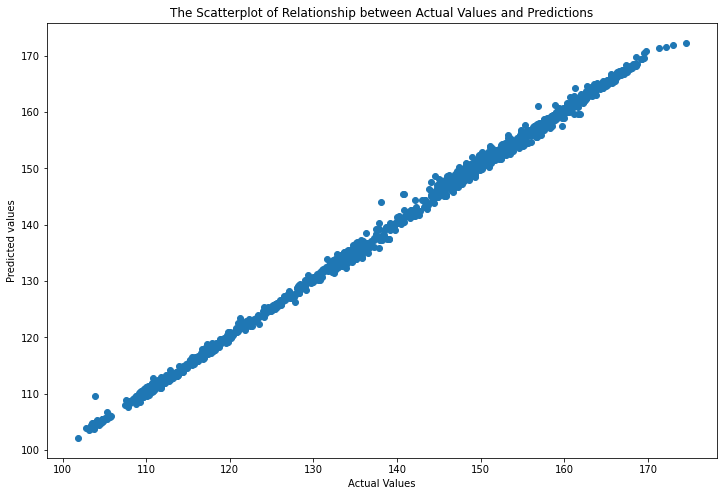

In [51]:
plt.figure(figsize=(12,8))
plt.xlabel("Actual Values")
plt.ylabel("Predicted values")
plt.title("The Scatterplot of Relationship between Actual Values and Predictions")
plt.scatter(predictions_df['Actual'], predictions_df['Predicted'])

In [52]:
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,y_predict_test))
print ("MSE:",metrics.mean_squared_error(y_test,y_predict_test))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_predict_test)))

MAE: 0.48120854966183946
MSE: 0.4581731044635205
RMSE: 0.6768848531792689


In [53]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_predict_test = model.predict(x_test_scaled)
y_predict_train = model.predict(x_train_scaled) 
print('R2_score (train): ',r2_score(y_train, y_predict_train))
print('R2_score (test): ',r2_score(y_test, y_predict_test))

376/376 [==============================] - 1s 2ms/step
R2_score (train):  0.9986566562968023
R2_score (test):  0.9981701593355503


In [55]:
format(np.round(metrics.explained_variance_score(y_test,y_predict_test)*100,2))


'99.85'